In [ ]:
!pip install xgboost pandas numpy matplotlib

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('house_price_data/train.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
!pip install xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.1 MB/s eta 0:00:00a 0:00:01


In [11]:
pd.Series(list('abca'))

0    a
1    b
2    c
3    a
dtype: object

In [24]:
# filter df with column Saletype='New'
df[df['SaleType'] == 'New']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1376,20,RL,89.0,10991,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,239000
1394,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
1402,1403,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,193879
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617


In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

# Handle categorical variables
X = pd.get_dummies(X)

X.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False


In [29]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [34]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [33]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
11,12,60,85.0,11924,9,5,2005,2006,286.0,998,...,147,21,0,0,0,0,0,7,2006,345000
13,14,20,91.0,10652,7,5,2006,2007,306.0,0,...,160,33,0,0,0,0,0,8,2007,279500
20,21,60,101.0,14215,8,5,2005,2006,380.0,0,...,240,154,0,0,0,0,0,11,2006,325300
48,49,190,33.0,4456,4,5,1920,2008,0.0,0,...,0,0,102,0,0,0,0,6,2009,113000
58,59,60,66.0,13682,10,5,2006,2006,1031.0,0,...,192,0,37,0,0,0,0,10,2006,438780


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

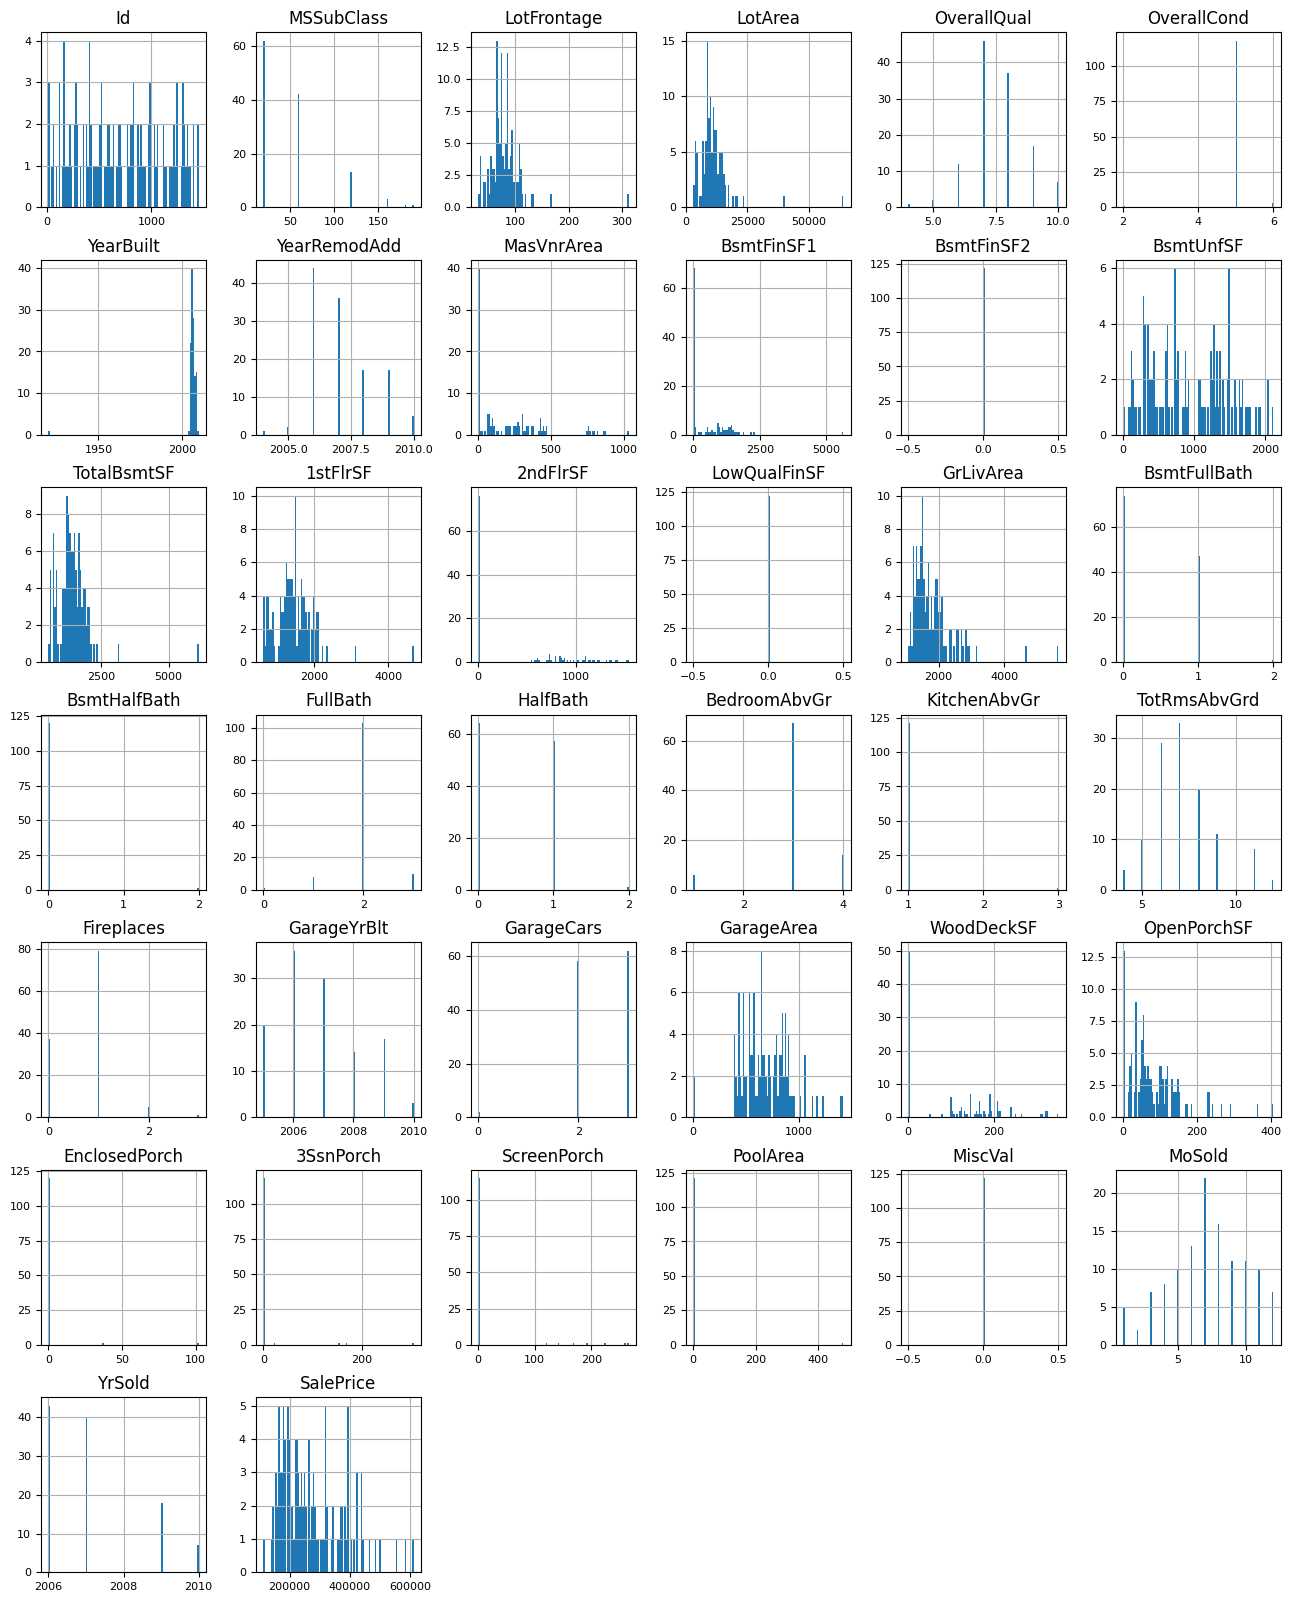

In [35]:
# explain
df_num.hist(figsize=(16,20), bins=100, xlabelsize=8, ylabelsize=8)

In [30]:

# Split the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [32]:
from sklearn.metrics import roc_auc_score

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
# compute auc
# auc = roc_auc_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RMSE: {rmse} AUC: {auc}")

# Feature importance
importance = model.get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Top 10 important features:")
for feature, score in importance[:10]:
    print(f"{feature}: {score}")

Top 10 important features:
GrLivArea: 68.0
OverallQual: 44.0
TotalBsmtSF: 39.0
BsmtFinSF1: 37.0
LotArea: 34.0
OverallCond: 32.0
YearBuilt: 28.0
2ndFlrSF: 23.0
GarageYrBlt: 22.0
YearRemodAdd: 17.0


In [42]:
test_csv = pd.read_csv('house_price_data/test.csv')
test_csv.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [44]:
ids = test_csv['Id']
ids.head(3)

0    1461
1    1462
2    1463
Name: Id, dtype: int64

## use xgboost

In [54]:
# Preprocess the test data
X_test = test_csv.drop(['Id'], axis=1)  # Remove 'Id' column
X_test = pd.get_dummies(X_test)  # Handle categorical variables

missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X_train.columns]
X_test = xgb.DMatrix(X_test)

y_pred = model.predict(X_test)

result = pd.DataFrame({"Id":ids, "SalePrice":y_pred})
result.to_csv("house_price_predictions.csv", index=False)
print("Predictions saved to house_price_predictions.csv")

Predictions saved to house_price_predictions.csv


## use pytorch

In [55]:
!pip install torch torchvision pandas numpy scikit-learn

  Using cached torch-2.4.1-cp310-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Using cached torchvision-0.19.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.4.1-cp310-none-macosx_11_0_arm64.whl (62.1 MB)
Using cached torchvision-0.19.1-cp310-cp310-macosx_11_0_arm64.whl (1.7 MB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 21.3 MB/s eta 0:00:00a 0:00:01
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [56]:
from torch.utils.data import Dataset, DataLoader

In [83]:
train_data = pd.read_csv('house_price_data/train.csv')
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [63]:
set(train_data.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [84]:
train_data = pd.get_dummies(train_data)
train_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False


In [70]:
test_data = pd.read_csv('house_price_data/test.csv')
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [71]:
test_data = pd.get_dummies(test_data)
test_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False


In [85]:
train_data['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [98]:
# Align train and test data to have the same columns
train_data, test_data = train_data.align(test_data, join='outer', axis=1)

# Fill NaN values in train_data and test_data
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [96]:
test_data['SalePrice'].head(3)

0    0.0
1    0.0
2    0.0
Name: SalePrice, dtype: float64

In [97]:
train_data['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [104]:
x_train = train_data.drop(['SalePrice'], axis=1)
x_train.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,False,False,3,True,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,False,False,3,True,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,False,False,3,True,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008


In [103]:
y_train = train_data['SalePrice']
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [2]:
import torch

class HousePriceDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = torch.tensor(x_train.values)
        self.y_train = torch.tensor()


NameError: name 'Dataset' is not defined